<a href="https://colab.research.google.com/github/JinYoungPark95/2022_DL_Project/blob/main/MobileNetv2_D8_OP_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브를 코랩 서버에 붙힐 것이다. >> 마운트 하는 과정
# 코드 스니펫

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls -al /gdrive/MyDrive/tmp/glaucoma.zip

-rw------- 1 root root 124001785 Jan 18 07:28 /gdrive/MyDrive/tmp/glaucoma.zip


In [ ]:
!cp /gdrive/MyDrive/tmp/glaucoma.zip ./
#이 파일을 구글에서 카피해 오는 것이다.

In [ ]:
!ls -al #잘 카피가 되었는지 확인하는 과정

total 121116
drwxr-xr-x 1 root root      4096 Jan 21 12:25 .
drwxr-xr-x 1 root root      4096 Jan 21 12:25 ..
drwxr-xr-x 4 root root      4096 Jan  7 14:33 .config
-rw------- 1 root root 124001785 Jan 21 12:25 glaucoma.zip
drwxr-xr-x 1 root root      4096 Jan  7 14:33 sample_data


In [ ]:
!unzip glaucoma.zip

Archive:  glaucoma.zip
   creating: glaucoma/test/
   creating: glaucoma/test/advanced/
  inflating: glaucoma/test/advanced/1.png  
  inflating: glaucoma/test/advanced/10.png  
  inflating: glaucoma/test/advanced/11.png  
  inflating: glaucoma/test/advanced/12.png  
  inflating: glaucoma/test/advanced/13.png  
  inflating: glaucoma/test/advanced/14.png  
  inflating: glaucoma/test/advanced/15.png  
  inflating: glaucoma/test/advanced/16.png  
  inflating: glaucoma/test/advanced/17.png  
  inflating: glaucoma/test/advanced/18.png  
  inflating: glaucoma/test/advanced/19.png  
  inflating: glaucoma/test/advanced/2.png  
  inflating: glaucoma/test/advanced/20.png  
  inflating: glaucoma/test/advanced/21.png  
  inflating: glaucoma/test/advanced/22.png  
  inflating: glaucoma/test/advanced/23.png  
  inflating: glaucoma/test/advanced/24.png  
  inflating: glaucoma/test/advanced/25.png  
  inflating: glaucoma/test/advanced/26.png  
  inflating: glaucoma/test/advanced/27.png  
  inflating: g

14548992/14536120 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 256)               16056576  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                         

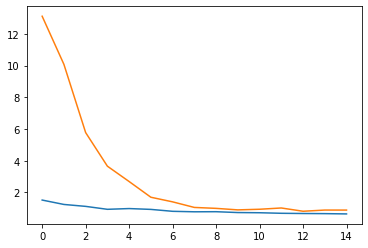

3/3 [==============================] - 1s 153ms/step - loss: 0.8906 - accuracy: 0.6579
loss= 0.8905768394470215
acc= 0.6578947305679321


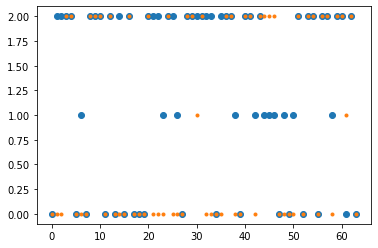

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

preprocessor = efficientnet.preprocess_input

conv_layers = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = MobileNetV2()
model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.8))
model.add(Dense(3, activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,             
      preprocessing_function=preprocessor   
).flow_from_directory(
      "glaucoma/train",          
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'              
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",  
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=15
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


학습이 제대로 된것 같지 않다고 느껴지기에 epoch를 늘려주었다.

loss가 떨어지는 것이 확인된다면 그것은 학습이 되고있다는 것이다.
만약 loss가 올라갔다면 overfitting이 발생한 것이다.
overfitting을 극복하려면, 

In [ ]:
conv_layers.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

efficientnet architecture를 참고하면 이해하는데 도움이 된다.